# Exploratory Data Analysis (EDA) of the Palmer Penguins Dataset

This notebook performs a comprehensive exploratory analysis of the Palmer Penguins dataset using Python. The goal is to explore species differences in physical characteristics, examine relationships among features, and perform basic statistical modeling to understand potential predictors of penguin body mass.


## 1. Importing Libraries and Loading the Dataset

We begin by importing essential libraries for data manipulation and visualization, then load the dataset using Seaborn’s built-in `penguins` dataset.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [12]:
penguin = sns.load_dataset('penguins')

In [13]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We observe that the dataset includes species, island location, bill measurements, flipper length, body mass, and sex. Some missing values are present.


In [14]:
penguin.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
penguin.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [18]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We have 344 total observations. However, some numerical features and the `sex` column have missing values. We’ll decide how to handle them in the next step.

In [21]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The numerical columns have only 2 missing values each, while the `sex` column has 11 missing values. To ensure clean data for visualizations and modeling, I created a new filtered dataset (`penguin2`) by dropping rows with any missing values in key columns.

In [23]:
penguin['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [24]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [65]:
penguin2 = penguin.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])


## 2. Feature Comparison by Species

Let’s examine how each species differs in physical features like bill length, bill depth, flipper length, and body mass.

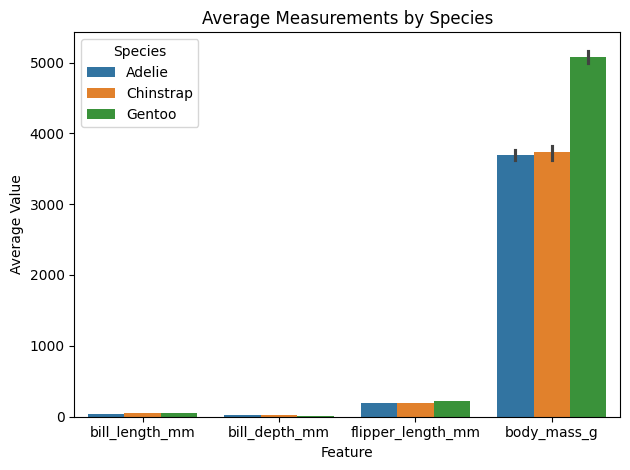

In [51]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguin_melted = penguin.melt(
    id_vars='species',
    value_vars=features,
    var_name='Feature',
    value_name='Value'
)

# Create the barplot
sns.barplot(data=penguin_melted, x='Feature', y='Value', hue='species')
plt.title('Average Measurements by Species')
plt.xlabel('Feature')
plt.ylabel('Average Value')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

### Descriptive Statistics by Species

Here, I compute the mean and standard deviation of bill measurements by species to identify key differences.


In [60]:
penguin.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg(['mean', 'std'])

bill_length_mm           bill_depth_mm          
                    mean       std          mean       std
species                                                   
Adelie         38.791391  2.663405     18.346358  1.216650
Chinstrap      48.833824  3.339256     18.420588  1.135395
Gentoo         47.504878  3.081857     14.982114  0.981220

In [61]:
penguin.groupby('sex')[['body_mass_g']].agg(['mean', 'std'])

body_mass_g            
               mean         std
sex                            
Female  3862.272727  666.172050
Male    4545.684524  787.628884

## 3. Differences by Sex

Visualizing how sex impacts features like body mass and bill measurements.


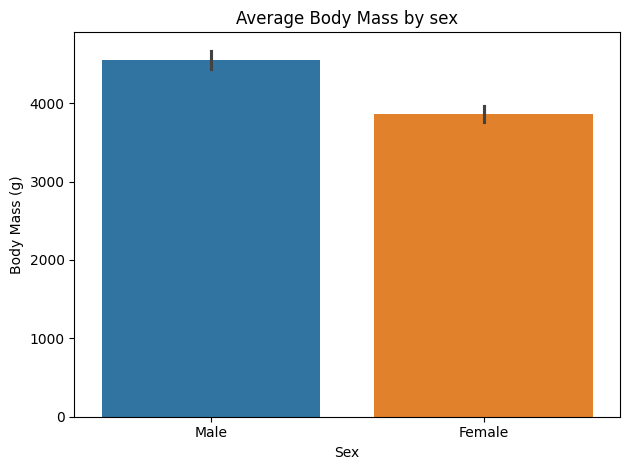

In [68]:
sns.barplot(data=penguin2, x='sex', y='body_mass_g', hue = 'sex')
plt.title('Average Body Mass by sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.tight_layout()
plt.show()

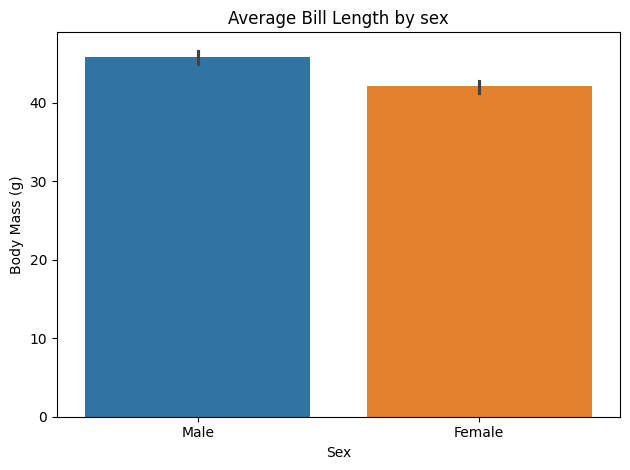

In [91]:
sns.barplot(data=penguin2, x='sex', y='bill_length_mm', hue = 'sex')
plt.title('Average Bill Length by sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.tight_layout()
plt.show()

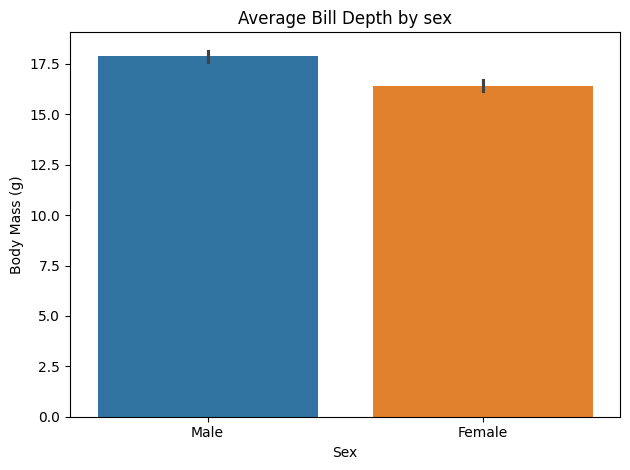

In [95]:
sns.barplot(data=penguin2, x='sex', y='bill_depth_mm', hue = 'sex')
plt.title('Average Bill Depth by sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.tight_layout()
plt.show()

## 4. Species Distribution Across Islands

Using a pivot table and heatmap to visualize how different penguin species are distributed across the three islands.

In [48]:
peng_pivot = penguin.pivot_table(index='island', columns='species', aggfunc='size', fill_value=0)
peng_pivot

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


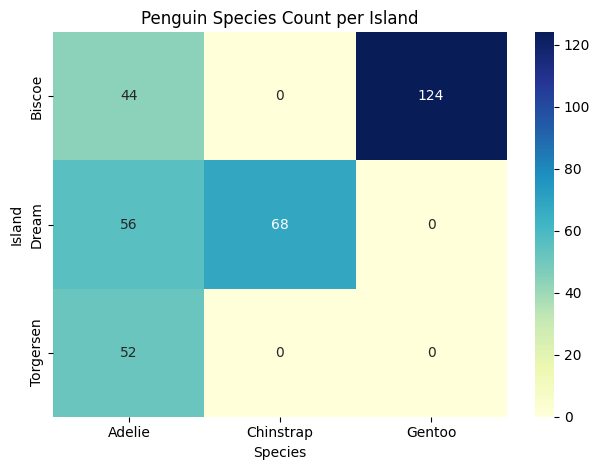

In [49]:
sns.heatmap(peng_pivot, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Penguin Species Count per Island')
plt.xlabel('Species')
plt.ylabel('Island')
plt.tight_layout()
plt.show()

## 5. Feature Relationships

Scatter plots help us explore how body mass relates to bill length and bill depth.


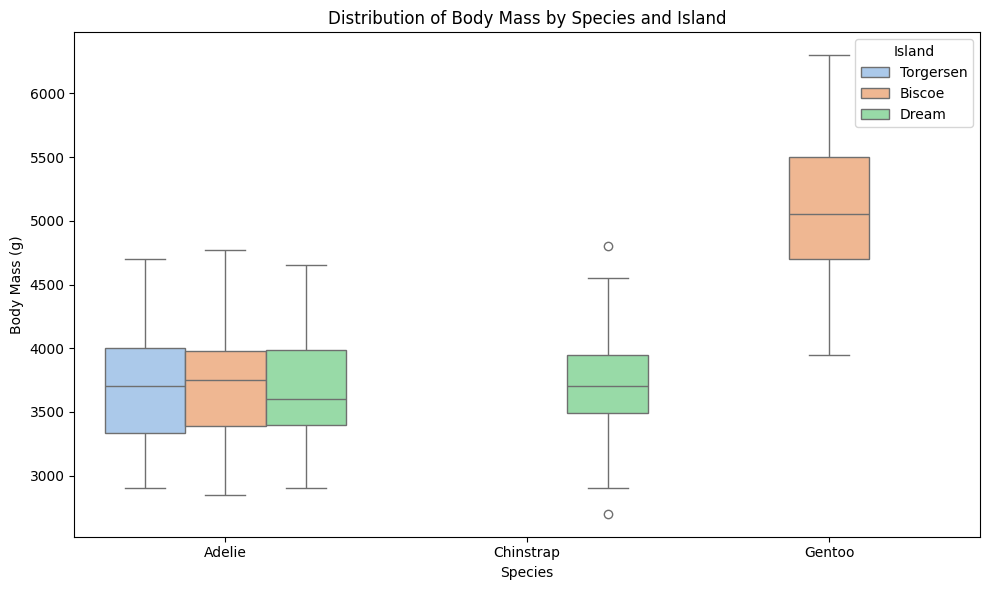

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguin2, x='species', y='body_mass_g', hue='island', palette='pastel')

plt.title('Distribution of Body Mass by Species and Island')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.legend(title='Island')
plt.tight_layout()
plt.show()

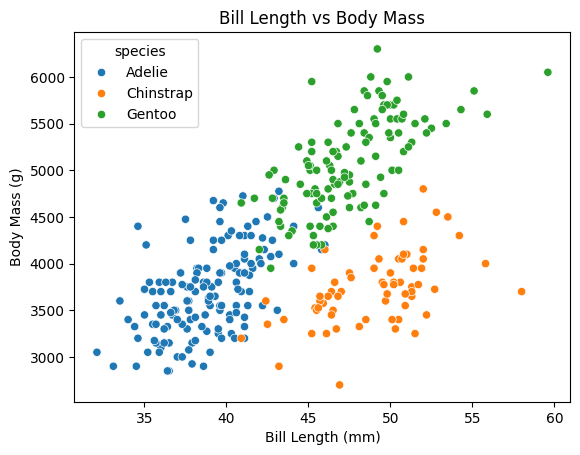

In [72]:
sns.scatterplot(data=penguin2, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

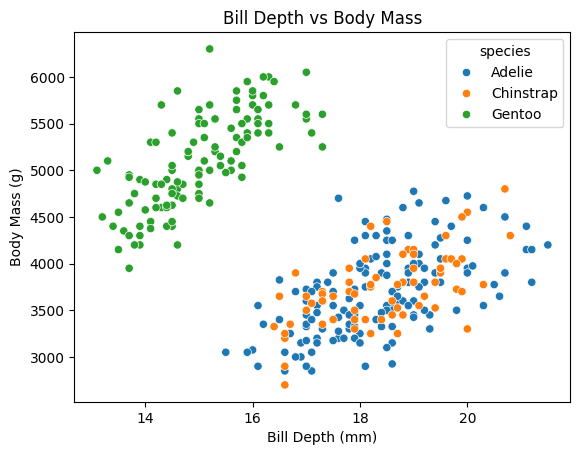

In [75]:
sns.scatterplot(data=penguin2, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.title('Bill Depth vs Body Mass')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

### Correlation Analysis

We compute correlation coefficients to assess linear relationships between key numerical variables.

In [94]:
##checking correlation coeffcients
print(penguin2[['bill_length_mm', 'bill_depth_mm', 'body_mass_g']].corr())

                bill_length_mm  bill_depth_mm  body_mass_g
bill_length_mm        1.000000      -0.228626     0.589451
bill_depth_mm        -0.228626       1.000000    -0.472016
body_mass_g           0.589451      -0.472016     1.000000


Bill length shows a moderate positive correlation with body mass (0.59), while bill depth has a moderate negative correlation (-0.47). This suggests bill length may be a stronger predictor of body mass.

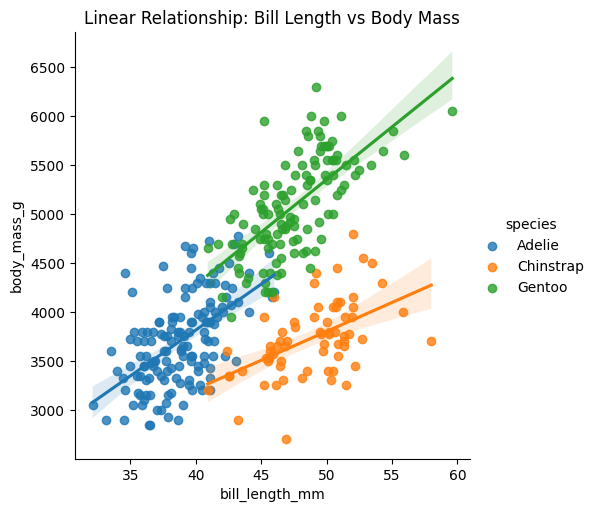

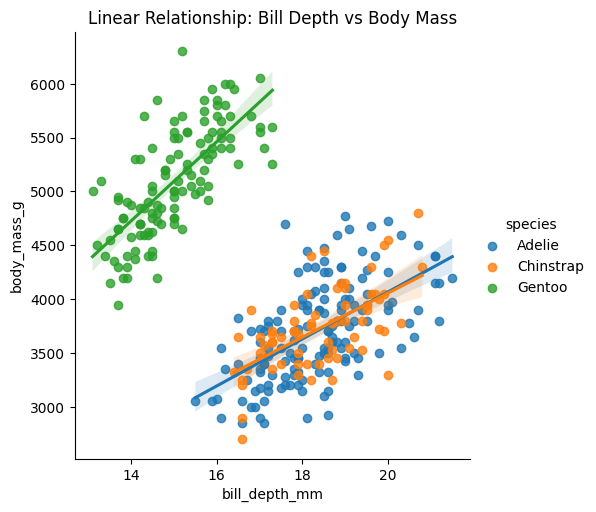

In [76]:
sns.lmplot(data=penguin2, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title('Linear Relationship: Bill Length vs Body Mass')
plt.show()

# Bill Depth vs Body Mass with regression line
sns.lmplot(data=penguin2, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.title('Linear Relationship: Bill Depth vs Body Mass')
plt.show()

## 6. Linear Regression Modeling

Using `statsmodels`, I run ordinary least squares (OLS) regressions to quantify the relationship between features and body mass.


In [85]:
import statsmodels.api as sm

In [88]:
X = penguin2[['bill_length_mm', 'bill_depth_mm']]
y = penguin2['body_mass_g']

# Add constant to predictor (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Wed, 28 May 2025   Prob (F-statistic):           7.04e-46
Time:                        21:48:24   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3413.4519    437.911      7.

### Regression with Categorical Predictors

To analyze how sex and island location influence body mass, I use dummy encoding for categorical variables.


In [89]:
## for catergorical data a dummy variable must be created first
X = pd.get_dummies(penguin2[['sex', 'island']], drop_first=True)
X = X.astype(float)
y = penguin2['body_mass_g']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.02e-59
Time:                        21:50:32   Log-Likelihood:                -2561.6
No. Observations:                 333   AIC:                             5131.
Df Residuals:                     329   BIC:                             5146.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4375.8482     51.323  

The model using bill measurements explains ~47% of the variance in body mass. Including sex and island improves the model to ~56%, indicating these factors are meaningful predictors.


## 7. Conclusion

Through this exploratory analysis, I observed clear differences in physical traits across penguin species and sexes. Bill length appears to be positively associated with body mass, while bill depth shows a negative association. The Gentoo species tends to have higher body mass overall. Regression models confirm that bill measurements, sex, and island significantly predict body mass, although more complex models could further improve prediction accuracy.

This analysis demonstrates fundamental EDA skills including data cleaning, visualization, and basic statistical modeling using real-world biological data.
